In [1]:

!pip install pandas scikit-learn matplotlib seaborn --quiet

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Libraries installed and imported successfully!")


Libraries installed and imported successfully!


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
num_samples = 1000  # Adjust based on requirement

data = {
    "temperature": np.random.randint(60, 120, num_samples),
    "pressure": np.random.randint(50, 200, num_samples),
    "vibration": np.random.uniform(0.1, 5.0, num_samples),
    "working_hours": np.random.randint(100, 5000, num_samples),
    "failure": np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1])  # 10% failure cases
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save dataset as CSV
df.to_csv("synthetic_maintenance_data.csv", index=False)

# Display first few rows
print("Synthetic dataset generated successfully!\n")
df.head()


Synthetic dataset generated successfully!



,temperature,pressure,vibration,working_hours,failure
0,98,83,0.566781,1923,0
1,111,141,3.295404,1574,0
2,88,144,1.629525,2342,0
3,74,121,2.055325,3343,0
4,102,88,4.304133,3234,0


In [3]:
# Load dataset
df = pd.read_csv("synthetic_maintenance_data.csv")

# Split features and target variable
X = df.drop(columns=["failure"])  # Features
y = df["failure"]  # Target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [4]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       178
           1       0.00      0.00      0.00        22

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-5-162b9dc1b211>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")


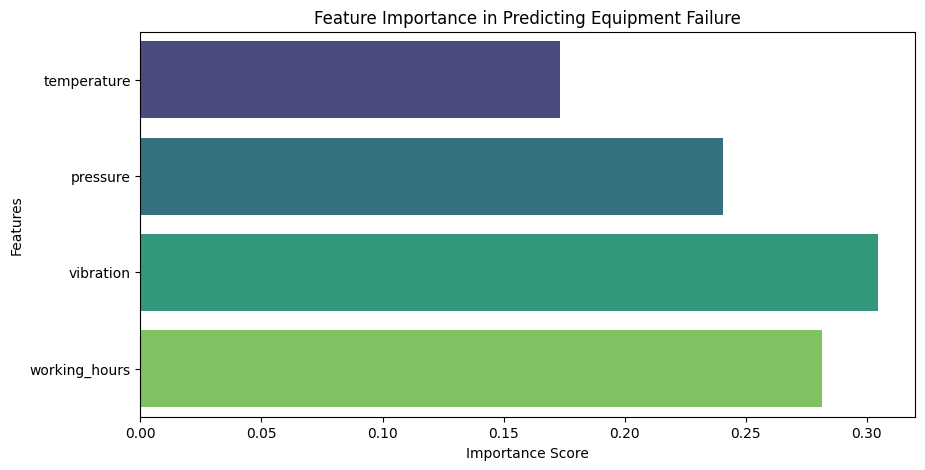

In [5]:
# Feature importance visualization
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importance, y=features, palette="viridis")
plt.title("Feature Importance in Predicting Equipment Failure")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [6]:
import joblib


joblib.dump(model, "predictive_maintenance_model.pkl")

print("Trained model saved successfully as 'predictive_maintenance_model.pkl'!")
SS

Trained model saved successfully as 'predictive_maintenance_model.pkl'!
